In [39]:

import os  # For handling directories and also file's path
import cv2  # img processing
import numpy as np 
from tqdm import tqdm  # It is for progress bars during loading

# We define  function for  load images from a perticuler directory.
def load_images_from_directory(directory_path):
    # empty list for storing the imag
    images = []
    
    # Iterate in each file in the directory
    for file in os.listdir(directory_path):
        # Checking  if the file ends with either '.jpg' or '.tiff'
        if file.endswith('.jpg') or file.endswith('.tiff'):
            # Reading  the images file using openCV and convert it to grayscale
            img = cv2.imread(os.path.join(directory_path, file), cv2.IMREAD_GRAYSCALE)
            # Append the grayscale image to the list of images
            images.append(img)
    
    # Return the list of images
    return images

# these are the paths to directories containing different types of imag i know in first there is no need to accese all img but just for clear understanding 
closed_heart_path = 'data/heart/closed'  
open_heart_path = 'data/heart/open' 
contours_path = 'data/heart/various/contours' 
masks_path = 'data/heart/various/masks' 
non_heart_path = 'data/non-heart' 

closed_heart_images = load_images_from_directory(closed_heart_path)
open_heart_images = load_images_from_directory(open_heart_path)
contours_images = load_images_from_directory(contours_path)
masks_images = load_images_from_directory(masks_path)
non_heart_images = load_images_from_directory(non_heart_path)

# convert the lists of images into NumPy arrays for easier manipulation
closed_heart_images = np.array(closed_heart_images)
open_heart_images = np.array(open_heart_images)
contours_images = np.array(contours_images)
masks_images = np.array(masks_images)
non_heart_images = np.array(non_heart_images)



print("Heart ultrasound images:")
print("Total number of closed heart ultrasound images:", len(closed_heart_images))
print("Total number of open heart ultrasound images:", len(open_heart_images))
print("Total number of various heart ultrasound images:", len(contours_images))
print("Total number of mask images:", len(masks_images))

print("\nNon-Heart Ultrasound Images:")
print("Number of non-heart images:", len(non_heart_images))




Heart ultrasound images:
Total number of closed heart ultrasound images: 80
Total number of open heart ultrasound images: 138
Total number of various heart ultrasound images: 218
Total number of mask images: 218

Non-Heart Ultrasound Images:
Number of non-heart images: 925


Visualizing 5 Closed Heart ultrasound images:


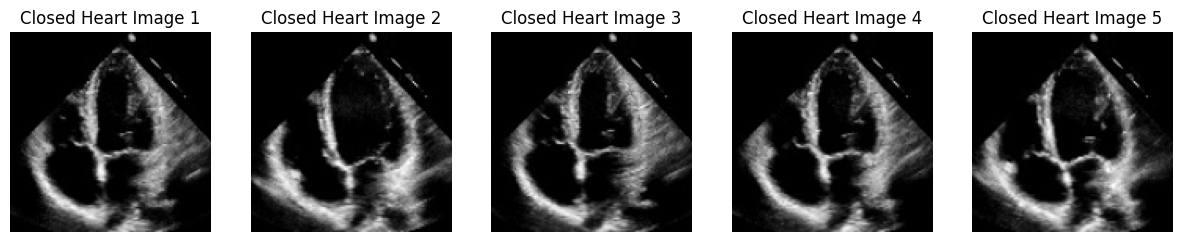

Visualizing 5 Open Heart ultrasound images:


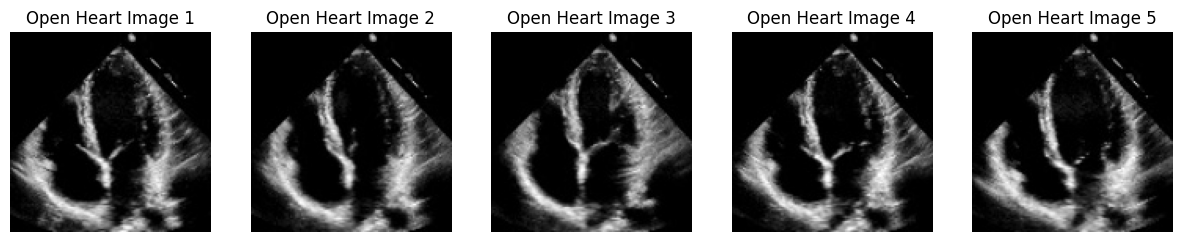

Visualizing 5 Various Heart ultrasound images:


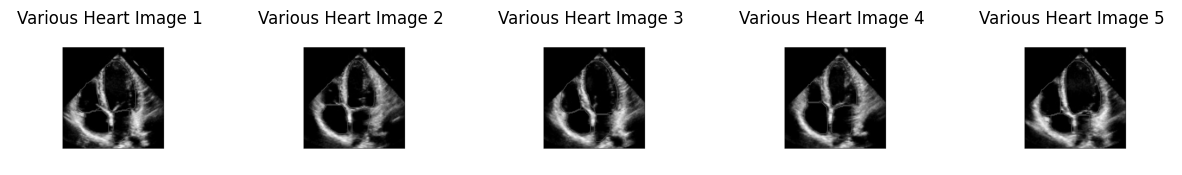

Visualizing 5 Mask ultrasound images:


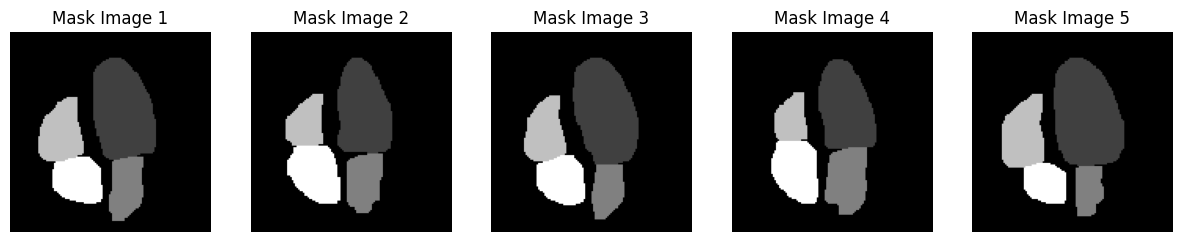

In [4]:
import matplotlib.pyplot as plt
def visualize_imagess(images, category, num_images=5):
    print(f"Visualizing {num_images} {category} ultrasound images:")
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f"{category} Image {i+1}")
    plt.show()

#for closed heart
visualize_imagess(closed_heart_images, "Closed Heart")

#for open
visualize_imagess(open_heart_images, "Open Heart")

#for tiff format heart
visualize_imagess(contours_images, "Various Heart")

#for mask
visualize_imagess(masks_images, "Mask")


In [40]:
import cv2
import os
import numpy as np
import pandas as pd

resize_width = 75
resize_height = 75

#this function for loading img with correct format 
def load_and_flatten_images(directory, label, block_size=11, constant=2):
    images = []
    for file in os.listdir(directory):
        if file.endswith('.jpg') or file.endswith('.tiff'):
            img = cv2.imread(os.path.join(directory, file), cv2.IMREAD_GRAYSCALE)
            
            #image resize(25*25)
            img = cv2.resize(img, (resize_width, resize_height))
            
            
           # Apply histogram equalization
            img = cv2.equalizeHist(img)
            
            # and then normalizations
            normalized_img = img.astype('float32') / 255.0
            
            images.append(normalized_img.flatten())
    labels = [label] * len(images)
    return images, labels

closed_images, closed_labels = load_and_flatten_images(closed_heart_path, 'Its_heart')
open_images, open_labels = load_and_flatten_images(open_heart_path, 'Its_heart')
non_heart_images, non_heart_labels = load_and_flatten_images(non_heart_path, 'its_abdominal')

#combining the  closed heart and open heart because for first task we only need these two types of heart 
heart_images = np.concatenate([closed_images, open_images])
heart_labels = np.concatenate([closed_labels, open_labels])

#converting it into dataframe pd converstions 
heart_data = pd.DataFrame(heart_images)
heart_data['class'] = heart_labels

# converting the  non heart into dataframe 
non_heart_data = pd.DataFrame(non_heart_images)
non_heart_data['class'] = non_heart_labels

# displaying the data
print("Heart Ultrasound Images:")
print(heart_data)

print("\nNon-Heart Ultrasound Images:")
print(non_heart_data)


Heart Ultrasound Images:
       0    1    2    3    4    5    6    7    8    9  ...      5616  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.141176   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.160784   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.200000   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
213  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.235294   
214  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
215  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
216  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
217  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

         5617      5618      5619      5620      5621      5622      5623  \
0    0.000000  0.000000  0.176471

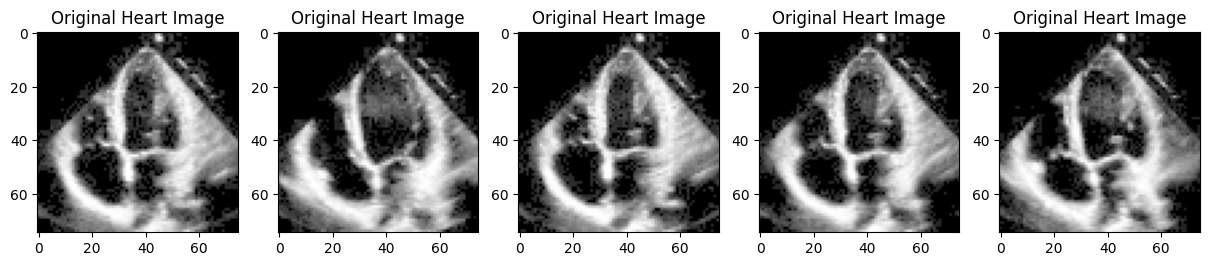

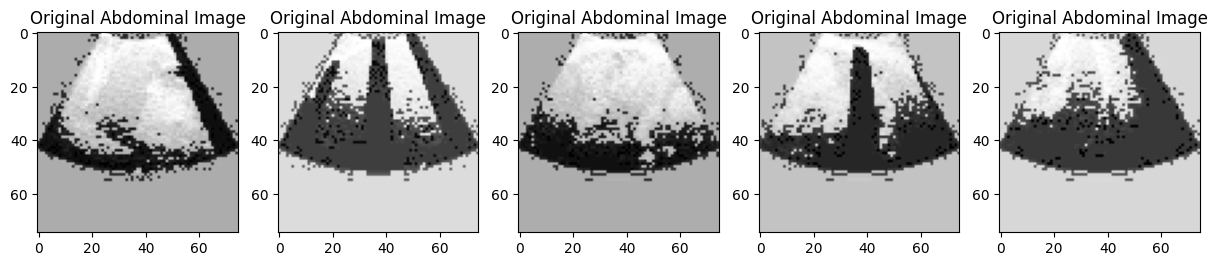

In [15]:
import matplotlib.pyplot as plt

# Convert heart images and abdominal images to NumPy arrays of float type
heart_images = heart_data.iloc[:, :-1].values.astype(float)
abdominal_images = non_heart_data.iloc[:, :-1].values.astype(float)

# Plot original heart images
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(heart_images[i].reshape(resize_width, resize_height), cmap='gray')
    axes[i].set_title('Original Heart Image')
plt.show()

# Plot original abdominal images
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(abdominal_images[i].reshape(resize_width, resize_height), cmap='gray')
    axes[i].set_title('Original Abdominal Image')
plt.show()


In [42]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

# loading heart dataframe and non heart dataframe 
X_heart = heart_data.drop('class', axis=1)
y_heart = heart_data['class'] # this is lable or in simple word column attribute 

#spliting data in to feature and lables 
X_non_heart = non_heart_data.drop('class', axis=1)
y_non_heart = non_heart_data['class']

# spliting data in train and test for heart
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42, stratify=y_heart)

# spliting data in train and test for non heart 
X_train_non_heart, X_test_non_heart, y_train_non_heart, y_test_non_heart = train_test_split(X_non_heart, y_non_heart, test_size=0.2, random_state=42, stratify=y_non_heart)

X_train = pd.concat([X_train_heart, X_train_non_heart], axis=0)
X_test = pd.concat([X_test_heart, X_test_non_heart], axis=0)
y_train = pd.concat([y_train_heart, y_train_non_heart], axis=0)
y_test = pd.concat([y_test_heart, y_test_non_heart], axis=0)


#train the classifire
svm = SVC(probability=True)  #this true ensure to enable predict_proba so it can work efficently
rf = RandomForestClassifier()
nb = GaussianNB()

svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)

#prictions
svm_preds = svm.predict(X_test)
rf_preds = rf.predict(X_test)
nb_preds = nb.predict(X_test)

#  now evavulate the machine learning model
svm_precision = precision_score(y_test, svm_preds, average='weighted')
svm_recall = recall_score(y_test, svm_preds, average='weighted')
svm_f1 = f1_score(y_test, svm_preds, average='weighted')

rf_precision = precision_score(y_test, rf_preds, average='weighted')
rf_recall = recall_score(y_test, rf_preds, average='weighted')
rf_f1 = f1_score(y_test, rf_preds, average='weighted')

nb_precision = precision_score(y_test, nb_preds, average='weighted')
nb_recall = recall_score(y_test, nb_preds, average='weighted')
nb_f1 = f1_score(y_test, nb_preds, average='weighted')

# calcualte auc_roc _score (Week 7 (5/3) – TOPIC 6: Metrics for Performance Evaluation)
svm_scores = svm.decision_function(X_test)
svm_auc_roc = roc_auc_score(y_test, svm_scores)


rf_probs = rf.predict_proba(X_test)
rf_auc_roc = roc_auc_score(y_test, rf_probs[:, 1])

nb_probs = nb.predict_proba(X_test)
nb_auc_roc = roc_auc_score(y_test, nb_probs[:, 1])

# Print evaluation metrics
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1-score:", svm_f1)
print("SVM AUC-ROC:", svm_auc_roc)
print()
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-score:", rf_f1)
print("Random Forest AUC-ROC:", rf_auc_roc)
print()
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes AUC-ROC:", nb_auc_roc)


joblib.dump(svm, 'svm_model.pkl')
joblib.dump(rf, 'rf_model.pkl')
joblib.dump(nb, 'nb_model.pkl')
svm = joblib.load('svm_model.pkl')
rf = joblib.load('rf_model.pkl')
nb = joblib.load('nb_model.pkl')

SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0
SVM AUC-ROC: 1.0

Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0
Random Forest AUC-ROC: 1.0

Naive Bayes Precision: 0.9956566652580175
Naive Bayes Recall: 0.9956331877729258
Naive Bayes F1-score: 0.9956139763426118
Naive Bayes AUC-ROC: 0.9886363636363636


In [44]:
import os

#folder which is containing the unseen img data 
test_image_dir = r'sometestingofmodel'
test_images = []
for file in os.listdir(test_image_dir):
    if file.endswith('.jpg') or file.endswith('.tiff'):
        img = cv2.imread(os.path.join(test_image_dir, file), cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, (resize_width, resize_height))
        img_histogram = cv2.equalizeHist(img_resized)
        normalized_img = img_histogram.astype('float32') / 255.0
        test_images.append(normalized_img.flatten())
X_test = pd.DataFrame(test_images)



# make the predictions 
svm_preds = svm.predict(X_test)
rf_preds = rf.predict(X_test)
nb_preds = nb.predict(X_test)

# display the output
# I know we are not working with tiff format type img just for my prectise im writing complete code 
for i, file in enumerate(os.listdir(test_image_dir)):
    if file.endswith('.jpg') or file.endswith('.tiff'):
        print(f"Image: {file}, SVM Prediction: {svm_preds[i]}, RF Prediction: {rf_preds[i]}, NB Prediction: {nb_preds[i]}")




Image: 1.jpg, SVM Prediction: its_abdominal, RF Prediction: its_abdominal, NB Prediction: its_abdominal
Image: 2.jpg, SVM Prediction: its_abdominal, RF Prediction: its_abdominal, NB Prediction: its_abdominal
Image: 23.jpg, SVM Prediction: Its_heart, RF Prediction: Its_heart, NB Prediction: Its_heart
Image: 25.jpg, SVM Prediction: Its_heart, RF Prediction: Its_heart, NB Prediction: Its_heart
Image: 26.jpg, SVM Prediction: Its_heart, RF Prediction: Its_heart, NB Prediction: Its_heart
Image: 27.jpg, SVM Prediction: Its_heart, RF Prediction: Its_heart, NB Prediction: Its_heart
Image: 3.jpg, SVM Prediction: its_abdominal, RF Prediction: its_abdominal, NB Prediction: its_abdominal
Image: 4.jpg, SVM Prediction: its_abdominal, RF Prediction: its_abdominal, NB Prediction: its_abdominal


In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models


# spliting data  for train and test
all_images = np.concatenate([heart_images, non_heart_images])
all_labels = np.concatenate([heart_labels, non_heart_labels])
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

#yes we have done this step normalization but its good prectise to ensure again your code 
train_images_normalized = train_images.astype('float32') / 255.0
test_images_normalized = test_images.astype('float32') / 255.0

image_shape = (75, 75, 1)  #  grayscale images with dimensions 25x25
train_images_reshaped = train_images_normalized.reshape(-1, 75, 75, 1)
test_images_reshaped = test_images_normalized.reshape(-1, 75, 75, 1)

#its a one hot encoding so that it will convert all string into numerical format for easy manipulation for machine learning model
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_test_labels = label_encoder.transform(test_labels)
num_classes = len(label_encoder.classes_)

#  architecture of the CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=image_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compiling the CNN model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Training the model
cnn_model.fit(train_images_reshaped, encoded_train_labels, epochs=10, batch_size=32, validation_split=0.1)

# Evaluating the model
test_loss, test_accuracy = cnn_model.evaluate(test_images_reshaped, encoded_test_labels)
print('Test accuracy:', test_accuracy)

# saving this model in this perticuler location its a pb format type.
cnn_model.save(r'C:\Users\Hp\Desktop\ads')





Epoch 1/10


26/26 [==============================] - 6s 116ms/step - loss: 0.7016 - accuracy: 0.7871 - val_loss: 0.6077 - val_accuracy: 0.8152
Epoch 2/10
26/26 [==============================] - 3s 97ms/step - loss: 0.6177 - accuracy: 0.8090 - val_loss: 0.5983 - val_accuracy: 0.8152
Epoch 3/10
26/26 [==============================] - 2s 94ms/step - loss: 0.6031 - accuracy: 0.8090 - val_loss: 0.5676 - val_accuracy: 0.8152
Epoch 4/10
26/26 [==============================] - 3s 97ms/step - loss: 0.5260 - accuracy: 0.8090 - val_loss: 0.4041 - val_accuracy: 0.8152
Epoch 5/10
26/26 [==============================] - 3s 96ms/step - loss: 0.2711 - accuracy: 0.8783 - val_loss: 0.2070 - val_accuracy: 0.9239
Epoch 6/10
26/26 [==============================] - 3s 100ms/step - loss: 0.1627 - accuracy: 0.9307 - val_loss: 0.1366 - val_accuracy: 0.9239
Epoch 7/10
26/26 [==============================] - 3s 97ms/step - loss: 0.1300 - accuracy: 0.9234 - val_loss: 0.1374 - val_accuracy: 0.9239
Epoch 

INFO:tensorflow:Assets written to: C:\Users\Hp\Desktop\ads\assets


In [52]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

X_combined = np.concatenate((X_heart, X_non_heart), axis=0)
y_combined = np.concatenate((y_heart, y_non_heart), axis=0)

# number of folds 
n_folds = 5

# list for stroing the evavulations
svm_precisions, svm_recalls, svm_f1s = [], [], []
rf_precisions, rf_recalls, rf_f1s = [], [], []
nb_precisions, nb_recalls, nb_f1s = [], [], []

# perfroming  n-fold cross-validation on SVM, Random Forest , Naive Bayes
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
for fold_idx, (train_index, test_index) in enumerate(skf.split(X_combined, y_combined), 1):
    X_train, X_test = X_combined[train_index], X_combined[test_index]
    y_train, y_test = y_combined[train_index], y_combined[test_index]
    
    #train machine learning model like we did earlier 
    svm = SVC()
    svm.fit(X_train, y_train)
    svm_preds = svm.predict(X_test)
    svm_prec = precision_score(y_test, svm_preds, average='weighted')
    svm_rec = recall_score(y_test, svm_preds, average='weighted')
    svm_f1 = f1_score(y_test, svm_preds, average='weighted')
    svm_precisions.append(svm_prec)
    svm_recalls.append(svm_rec)
    svm_f1s.append(svm_f1)
    

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)
    rf_prec = precision_score(y_test, rf_preds, average='weighted')
    rf_rec = recall_score(y_test, rf_preds, average='weighted')
    rf_f1 = f1_score(y_test, rf_preds, average='weighted')
    rf_precisions.append(rf_prec)
    rf_recalls.append(rf_rec)
    rf_f1s.append(rf_f1)
    

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    nb_preds = nb.predict(X_test)
    nb_prec = precision_score(y_test, nb_preds, average='weighted')
    nb_rec = recall_score(y_test, nb_preds, average='weighted')
    nb_f1 = f1_score(y_test, nb_preds, average='weighted')
    nb_precisions.append(nb_prec)
    nb_recalls.append(nb_rec)
    nb_f1s.append(nb_f1)
    
    # print the each fold evaluations for better understanding 
    print(f"Fold {fold_idx}:")
    print("SVM Precision:", svm_prec)
    print("SVM Recall:", svm_rec)
    print("SVM F1-score:", svm_f1)
    print()
    print("Random Forest Precision:", rf_prec)
    print("Random Forest Recall:", rf_rec)
    print("Random Forest F1-score:", rf_f1)
    print()
    print("Naive Bayes Precision:", nb_prec)
    print("Naive Bayes Recall:", nb_rec)
    print("Naive Bayes F1-score:", nb_f1)
    print("-" * 50)

# Print average evaluation metrics for each model
print("Average Evaluation Metrics:")
print("SVM Precision:", np.mean(svm_precisions))
print("SVM Recall:", np.mean(svm_recalls))
print("SVM F1-score:", np.mean(svm_f1s))
print()
print("Random Forest Precision:", np.mean(rf_precisions))
print("Random Forest Recall:", np.mean(rf_recalls))
print("Random Forest F1-score:", np.mean(rf_f1s))
print()
print("Naive Bayes Precision:", np.mean(nb_precisions))
print("Naive Bayes Recall:", np.mean(nb_recalls))
print("Naive Bayes F1-score:", np.mean(nb_f1s))


Fold 1:
SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0

Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0

Naive Bayes Precision: 0.9705467612809315
Naive Bayes Recall: 0.9694323144104804
Naive Bayes F1-score: 0.9683952733694239
--------------------------------------------------
Fold 2:
SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0

Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0

Naive Bayes Precision: 0.9871086128402862
Naive Bayes Recall: 0.9868995633187773
Naive Bayes F1-score: 0.9867210618632879
--------------------------------------------------
Fold 3:
SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0

Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0

Naive Bayes Precision: 0.9625219466078423
Naive Bayes Recall: 0.9606986899563319
Naive Bayes F1-score: 0.9589266459845557
--------------------------------------------------
Fold 4:
SVM Precision: 1.0
SVM Recall: 1.0


In [53]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

image_shape = (75, 75, 1)  
num_classes = 2 
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=image_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Loading  your data im reapting some step again this is for clear code and clear view persentable . it wont affect the my result .
X = np.concatenate([heart_images, non_heart_images], axis=0)
y = np.concatenate([heart_labels, non_heart_labels], axis=0)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation
fold = 0
for train_index, test_index in skf.split(X, y):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    X_train_normalized = X_train.astype('float32') / 255.0
    X_test_normalized = X_test.astype('float32') / 255.0
   
    X_train_reshaped = X_train_normalized.reshape(-1, *image_shape)
    X_test_reshaped = X_test_normalized.reshape(-1, *image_shape)
    
#one hot encoding changing the lable data into newmeric format
    label_encoder = LabelEncoder()
    encoded_train_labels = label_encoder.fit_transform(y_train)
    encoded_test_labels = label_encoder.transform(y_test)
    
    model.fit(X_train_reshaped, encoded_train_labels, epochs=5, batch_size=32, validation_split=0.1)

    # Evaluate the model on test data
    test_loss, test_acc = model.evaluate(X_test_reshaped, encoded_test_labels)
    print(f"Fold {fold}: Train samples: {len(train_index)}, Test samples: {len(test_index)}, Test accuracy: {test_acc}")


Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Program Files\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Program Files\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Program Files\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\Hp\AppData\Local\Temp\ipykernel_32288\174638306.py", line 48, in <module>

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 2 which is outside the valid range of [0, 2).  Label values: 1 1 2 1 1 1 0 1 2 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_6345]

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
num_classes = len(encoder.classes_)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train_reshaped)

model.fit(datagen.flow(X_train_reshaped, y_train_encoded, batch_size=32), epochs=10, validation_data=(X_test_reshaped, y_test_encoded))

#now i can be sure that these all model are capeble of  classification of heart non heart  with excellent accuracy 

NameError: name 'model' is not defined

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with augmented data and early stopping callback
history = model.fit(datagen.flow(X_train_reshaped, y_train_encoded, batch_size=32),
                    epochs=50,
                    validation_data=(X_test_reshaped, y_test_encoded),
                    callbacks=[early_stopping])

# Plot learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


NameError: name 'model' is not defined

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import time

closed_images, closed_labels = load_and_flatten_images(closed_heart_path, 'closed')
open_images, open_labels = load_and_flatten_images(open_heart_path, 'open')

# Concatenate the labels for closed and open heart images
heart_images = np.concatenate([closed_images, open_images])
heart_labels = np.concatenate([closed_labels, open_labels])

# Define labels for closed and open heart images
closed_heart_labels = ["closed"] * len(closed_images)
open_heart_labels = ["open"] * len(open_images)

# Concatenate the labels for closed and open heart images
heart_lab = np.concatenate([closed_heart_labels, open_heart_labels])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(heart_images, heart_lab, test_size=0.2, random_state=42, stratify=heart_lab)

# Normalize pixel values to the range [0, 1]
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# Reshape images to fit CNN input shape (assuming grayscale images)
input_shape = (75, 75, 1)
X_train_reshaped = X_train_normalized.reshape(-1, 75, 75, 1)
X_test_reshaped = X_test_normalized.reshape(-1, 75, 75, 1)

# One-hot encoding for labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
num_classes = len(encoder.classes_)

# Train the model
start_time = time.time()
model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)
training_time = time.time() - start_time

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_encoded)

# Make predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
precision = precision_score(y_test_encoded, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Training Time:", training_time)


NameError: name 'model' is not defined

In [37]:
from sklearn.metrics import confusion_matrix
heart_images = np.concatenate([closed_images, open_images])
heart_labels = np.concatenate([closed_labels, open_labels])

X_train, X_test, y_train, y_test = train_test_split( heart_images , heart_labels , test_size=0.2, random_state=42, stratify=heart_labels)

# Encode labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Train classifiers
svm = SVC(probability=True)
rf = RandomForestClassifier()
nb = GaussianNB()

svm.fit(X_train, y_train_encoded)
rf.fit(X_train, y_train_encoded)
nb.fit(X_train, y_train_encoded)

# Predictions
svm_preds = svm.predict(X_test)
rf_preds = rf.predict(X_test)
nb_preds = nb.predict(X_test)

# Evaluation metrics
svm_precision = precision_score(y_test_encoded, svm_preds, average='weighted')
svm_recall = recall_score(y_test_encoded, svm_preds, average='weighted')
svm_f1 = f1_score(y_test_encoded, svm_preds, average='weighted')

rf_precision = precision_score(y_test_encoded, rf_preds, average='weighted')
rf_recall = recall_score(y_test_encoded, rf_preds, average='weighted')
rf_f1 = f1_score(y_test_encoded, rf_preds, average='weighted')

nb_precision = precision_score(y_test_encoded, nb_preds, average='weighted')
nb_recall = recall_score(y_test_encoded, nb_preds, average='weighted')
nb_f1 = f1_score(y_test_encoded, nb_preds, average='weighted')

# Calculate AUC-ROC scores
svm_scores = svm.decision_function(X_test)
svm_auc_roc = roc_auc_score(y_test_encoded, svm_scores)

rf_probs = rf.predict_proba(X_test)
rf_auc_roc = roc_auc_score(y_test_encoded, rf_probs[:, 1])

nb_probs = nb.predict_proba(X_test)
nb_auc_roc = roc_auc_score(y_test_encoded, nb_probs[:, 1])

# Print evaluation metrics
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1-score:", svm_f1)
print("SVM AUC-ROC:", svm_auc_roc)
print()
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-score:", rf_f1)
print("Random Forest AUC-ROC:", rf_auc_roc)
print()
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes AUC-ROC:", nb_auc_roc)

print("\n")

classifiers = {
    'SVM': svm,
    'Random Forest': rf,
    'Naive Bayes': nb
}
conf_matrices = {}
for name, clf in classifiers.items():
    preds = clf.predict(X_test)

    conf_matrices[name] = confusion_matrix(y_test_encoded, preds)
for name, matrix in conf_matrices.items():
    print(f"Confusion Matrix for {name}:\n", matrix)


SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0
SVM AUC-ROC: 1.0

Random Forest Precision: 0.9780564263322884
Random Forest Recall: 0.9772727272727273
Random Forest F1-score: 0.9771055203992386
Random Forest AUC-ROC: 1.0

Naive Bayes Precision: 0.8825757575757577
Naive Bayes Recall: 0.8636363636363636
Naive Bayes F1-score: 0.865967365967366
Naive Bayes AUC-ROC: 0.8515625


Confusion Matrix for SVM:
 [[16  0]
 [ 0 28]]
Confusion Matrix for Random Forest:
 [[15  1]
 [ 0 28]]
Confusion Matrix for Naive Bayes:
 [[15  1]
 [ 5 23]]


In [54]:
print("Train Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)
print("Train Labels Shape:", y_train_encoded.shape)
print("Test Labels Shape:", y_test_encoded.shape)

Train Data Shape: (914, 5625)
Test Data Shape: (229, 5625)
Train Labels Shape: (174,)
Test Labels Shape: (44,)
